In [ ]:
# EXPLORING THE DATASET (EDA)
# Importing package
from google.colab import files

# Allow the users to upload the file directly from their computer
uploaded = files.upload()

# Load the dataset from the uploaded file
import pandas as pd
df = pd.read_csv('credit_scoring.csv')

# Display the first few rows of the dataset
df.head()

Saving credit_scoring.csv to credit_scoring.csv


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,424380.57,Working,Higher education,Civil marriage,Rented apartment,-11778.0,-4438.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,421593.52,Working,Higher education,Civil marriage,Rented apartment,-11777.0,-4459.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,110958.51,Working,Secondary / secondary special,Married,House / apartment,-21471.0,-1144.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,267497.96,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18489.0,-3122.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,263419.09,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19093.0,-3070.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


In [ ]:
# List of categorical variables to analyze
variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
             'FLAG_EMAIL', 'OCCUPATION_TYPE', 'TARGET']

# Loop through each variable in the list
for col in variables:
    value_counts = df[col].value_counts(dropna=False)  # Include NaNs if present
    n_classes = value_counts.shape[0]                  # Number of unique classes

    # Print formatted output
    print("=" * 50)
    print(f"Variable: {col}")
    print(f"Number of unique classes: {n_classes}")
    print("Classes and frequencies:")
    print(value_counts)
    print()  # Empty line for spacing

Variable: CODE_GENDER
Number of unique classes: 2
Classes and frequencies:
CODE_GENDER
F    227915
M    110511
Name: count, dtype: int64

Variable: FLAG_OWN_CAR
Number of unique classes: 2
Classes and frequencies:
FLAG_OWN_CAR
N    213195
Y    125231
Name: count, dtype: int64

Variable: FLAG_OWN_REALTY
Number of unique classes: 2
Classes and frequencies:
FLAG_OWN_REALTY
Y    231307
N    107119
Name: count, dtype: int64

Variable: NAME_INCOME_TYPE
Number of unique classes: 5
Classes and frequencies:
NAME_INCOME_TYPE
Working                 174365
Commercial associate     78090
Pensioner                57841
State servant            28113
Student                     17
Name: count, dtype: int64

Variable: NAME_EDUCATION_TYPE
Number of unique classes: 5
Classes and frequencies:
NAME_EDUCATION_TYPE
Secondary / secondary special    232568
Higher education                  91062
Incomplete higher                 11387
Lower secondary                    3177
Academic degree                   

The main features of the dataset are:

- ID: unique identifier for each client -> numerical (integer);
- CODE_GENDER: client's gender (e.g., M for male, F for female) -> categorical;
- FLAG_OWN_CAR: whether the client owns a car (Y/N) -> categorical;
- FLAG_OWN_REALTY: whether the client owns real estate property (Y/N) -> categorical;
- CNT_CHILDREN: number of children the client has -> numerical (integer);
- AMT_INCOME_TOTAL: client's total annual income -> numerical (float);
- NAME_INCOME_TYPE: type of income source (e.g., Working, Commercial associate) -> categorical;
- NAME_EDUCATION_TYPE: level of education (e.g., Higher education, Secondary) -> categorical;
- NAME_FAMILY_STATUS: marital status (e.g., Married, Single) -> categorical;
- NAME_HOUSING_TYPE: type of housing (e.g., House, Rented apartment) -> categorical;
- DAYS_BIRTH: client's age in days (negative number: days before today) -> numerical (float);
- DAYS_EMPLOYED: Number of days since the hiring date (a positive value indicates days since unemployment began) -> numerical (float);
- FLAG_MOBIL: mobile phone ownership flag (mostly always 1) -> numerical (float treated as boolean);
- FLAG_WORK_PHONE: work phone availability flag -> numerical (float treated as boolean);
- FLAG_PHONE: whether the client has a landline phone -> numerical (float treated as boolean);
- FLAG_EMAIL: whether the client has an email address -> numerical (float treated as boolean);
- OCCUPATION_TYPE: type of occupation (e.g., Sales staff, Security staff) -> categorical;
- CNT_FAM_MEMBERS: total number of family members -> numerical (float);
- TARGET: binary variable equal to 1 if the customer demonstrates high creditworthiness (regular installment payments), 0 otherwise -> numerical (integer - binary classification target)

In [ ]:
# NA count
df.isna().sum() # in order to check if it's necessary some kind of data imputation

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1


In [ ]:
# Fill missing values (NaN) in the 'OCCUPATION_TYPE' column with the string 'Unknown'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')  # Assign the result back to the column

# The `.fillna('Unknown')` method fills the NaN values in the 'OCCUPATION_TYPE' column with 'Unknown',
# but since inplace=True won't work as expected, we explicitly assign the result back to 'df['OCCUPATION_TYPE']'.

##**Why is this useful?**

- Filling NaN values with a placeholder like 'Unknown' is a common strategy when you have a large number of missing values and you don't want to drop those rows (which would result in losing valuable data). In your case, since there are 103,342 missing values, dropping those rows could result in significant data loss;

- Replacing NaN with 'Unknown' allows you to keep the rows in your dataset and still be able to work with the column in analysis or modeling without introducing too much bias or losing information. It essentially treats these missing values as a specific category.

##**Considerations:**

- By filling NaN with 'Unknown', you are assuming that these missing values do not correspond to any valid occupation. This might work for some contexts, but in others, it could create bias if the missingness of the data is not random;

- Depending on your downstream analysis or machine learning models, you may need to consider whether 'Unknown' is treated as a separate category or if it will impact your results.

In [ ]:
# Drop other variables NA (only 1 for a few ones)
df = df.dropna()

In [ ]:
df.isna().sum() # in order to check if there are any remaining residual NAs in the variables

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
# List of columns to check (you can modify it to include only the relevant boolean columns)
boolean_columns = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Iterate through each boolean column and convert the values to 1 and 0
for col in boolean_columns:
    df[col] = df[col].astype('category').cat.codes  # Convert 1.0/0.0 to 1/0 as categorical codes

# Show the first few rows of the DataFrame to verify the changes
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,424380.57,Working,Higher education,Civil marriage,Rented apartment,-11778.0,-4438.0,1.0,1,0,0,Unknown,2.0,0
1,5008805,M,Y,Y,0,421593.52,Working,Higher education,Civil marriage,Rented apartment,-11777.0,-4459.0,1.0,1,0,0,Unknown,2.0,0
2,5008806,M,Y,Y,0,110958.51,Working,Secondary / secondary special,Married,House / apartment,-21471.0,-1144.0,1.0,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,267497.96,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18489.0,-3122.0,1.0,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,263419.09,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19093.0,-3070.0,1.0,0,1,1,Sales staff,1.0,1


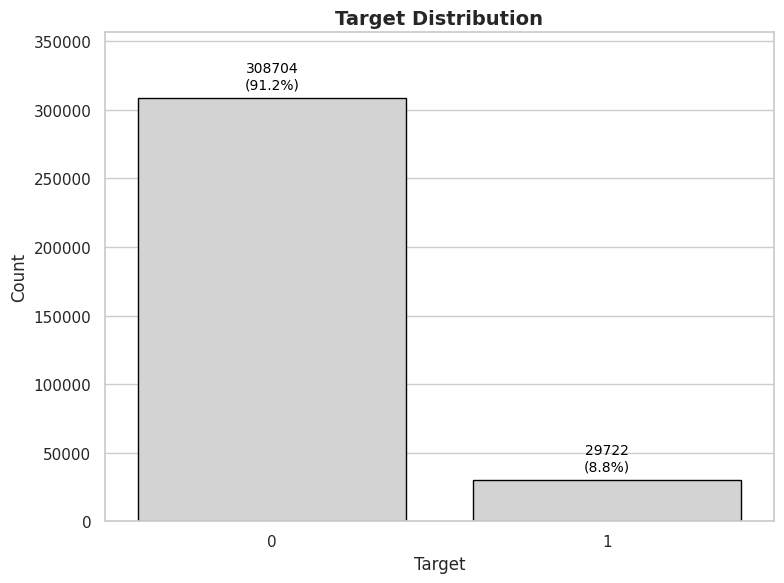

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of the 'Response' variable (percentages)
target_distribution = df['TARGET'].value_counts(normalize=True) * 100

# Plotting the bar plot
plt.figure(figsize=(8, 6))

# Create the count plot
sns.set(style="whitegrid")  # Set the style to whitegrid for better readability
ax = sns.countplot(x='TARGET', data=df, color='lightgray', edgecolor='black')

# Add both counts and percentages above the bars
for p in ax.patches:
    height = p.get_height()
    count = int(height)
    percentage = height / df.shape[0] * 100

    # Annotate both count and percentage above the bars
    ax.annotate(f'{count}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Target Distribution', fontsize=14, weight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Increase y-axis limit (e.g., set y-axis limit to 0 to max count + a little more space)
plt.ylim(0, ax.get_ylim()[1] * 1.1)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen from this bar plot that there are far fewer customers with high creditworthiness (about 8.8%) than those without (about 91.2%). We have, therefore, a situation of strong imbalance between these two categories of customers.

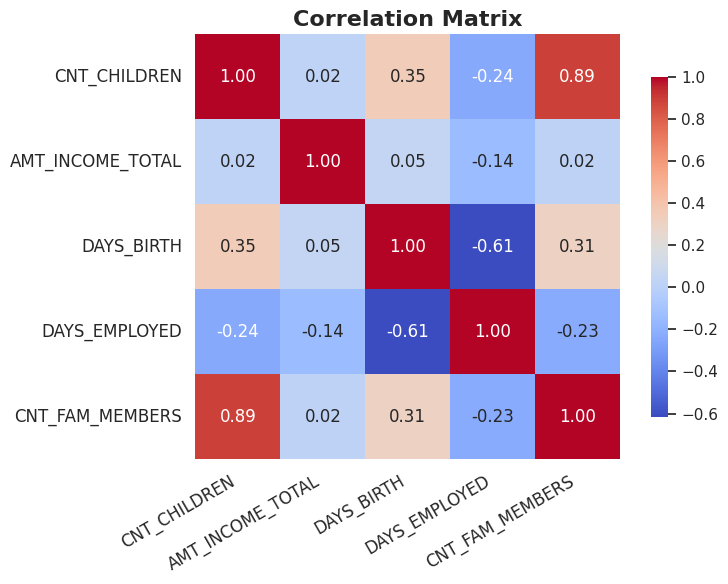

In [ ]:
# Select only the relevant columns, including the target
cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
corr_matrix = df[cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8},
            annot_kws={"size": 12})

# Improve axis labels
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=30, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##**Correlation matrix explanation:**

During the correlation analysis, CNT_CHILDREN and CNT_FAM_MEMBERS were found to be highly correlated (r = 0.89). To reduce redundancy and simplify the model without losing information, only CNT_FAM_MEMBERS was retained, as it inherently includes the count of children.

In contrast, DAYS_BIRTH and DAYS_EMPLOYED showed a moderate negative correlation (r = -0.61), indicating that older individuals tend to have fewer recent employment records or are more likely to be retired. It's possible to create a new binary categorical variable, starting from DAYS_EMPLOYED, for example IS_EMPLOYED, so we can use this last one to mantain DAYS_EMPLOYED same information, but not in a quantitative way. However, they were transformed from days into years (AGE_YEARS and YEARS_EMPLOYED) to enhance interpretability and facilitate downstream analysis.

In [ ]:
# Summary statistics
summary = df[['DAYS_BIRTH', 'DAYS_EMPLOYED']].describe()
print(summary)

          DAYS_BIRTH  DAYS_EMPLOYED
count  338426.000000  338426.000000
mean   -15998.212897   60234.533869
std      4193.088539  138522.923248
min    -26636.000000  -17973.000000
25%    -19467.000000   -3116.000000
50%    -15623.000000   -1483.000000
75%    -12516.250000    -378.000000
max     -7566.000000  396498.000000


In [ ]:
# Import package
import numpy as np

# Replace anomalous values in DAYS_EMPLOYED (positive values above 100 years)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 365 * 100 else x)

# Create the IS_EMPLOYED variable
# IS_EMPLOYED = 1 if DAYS_EMPLOYED is negative (employed), otherwise 0 (unemployed)
df['IS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)

# Display the result
df[['DAYS_EMPLOYED', 'IS_EMPLOYED']].head() # IS_EMPLOYED is useful to discriminate those who are employed
                                            # from those who are unemployed by discriminating these two
                                            # situations through a binary categorical variable, avoiding
                                            # using DAYS_EMPLOYED, which has values with different sign to
                                            # differentiate these two different employment situations (continuous quantitative variable)

,DAYS_EMPLOYED,IS_EMPLOYED
0,-4438.0,1
1,-4459.0,1
2,-1144.0,1
3,-3122.0,1
4,-3070.0,1


In [ ]:
# Convert days into years (absolute values)
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x / 365 if x < 0 else x / 365).round(1)

# Drop the original day-based columns
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

# Show the updated DataFrame
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,IS_EMPLOYED,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,424380.57,Working,Higher education,Civil marriage,Rented apartment,1.0,1,0,0,Unknown,2.0,0,1,32.3,12.2
1,5008805,M,Y,Y,0,421593.52,Working,Higher education,Civil marriage,Rented apartment,1.0,1,0,0,Unknown,2.0,0,1,32.3,12.2
2,5008806,M,Y,Y,0,110958.51,Working,Secondary / secondary special,Married,House / apartment,1.0,0,0,0,Security staff,2.0,0,1,58.8,3.1
3,5008808,F,N,Y,0,267497.96,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0,1,1,Sales staff,1.0,1,1,50.7,8.6
4,5008809,F,N,Y,0,263419.09,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0,1,1,Sales staff,1.0,1,1,52.3,8.4



Descriptive statistics for CNT_CHILDREN grouped by TARGET:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       308704.0  0.449609  0.740473  0.0  0.0  0.0  1.0  19.0
1        29722.0  0.214218  0.537640  0.0  0.0  0.0  0.0  14.0


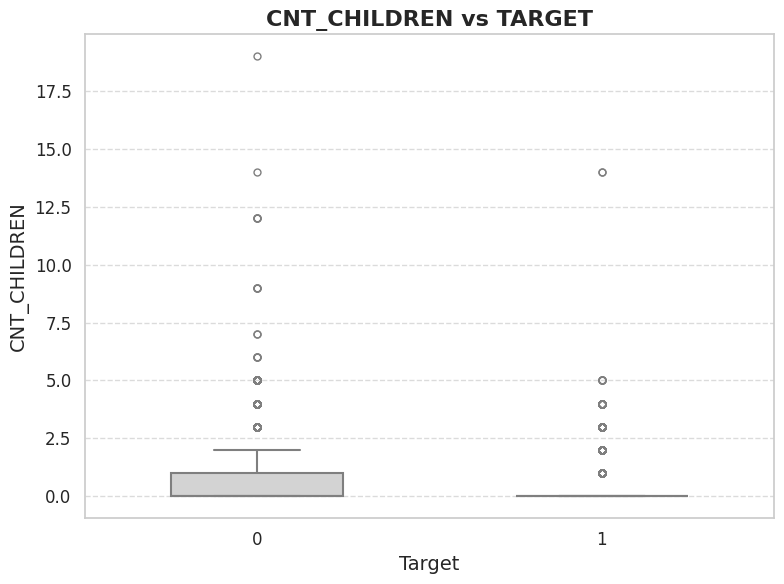


Descriptive statistics for AMT_INCOME_TOTAL grouped by TARGET:
           count           mean            std        min          25%  \
TARGET                                                                   
0       308704.0  179957.772681  105839.066792   25548.98  115126.6325   
1        29722.0  267759.590448  127956.791842  156890.64  199037.0750   

               50%         75%         max  
TARGET                                      
0       157687.120  220322.625  7071015.83  
1       228884.475  303430.875  4613500.42  


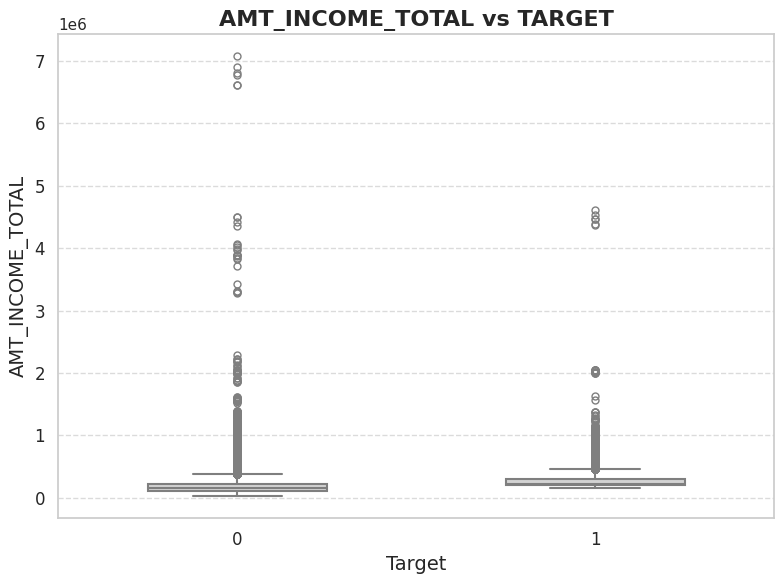


Descriptive statistics for AGE_YEARS grouped by TARGET:
           count       mean        std   min   25%   50%   75%   max
TARGET                                                              
0       308704.0  43.174732  11.698017  20.7  33.5  41.3  53.1  73.0
1        29722.0  50.643998   5.524255  40.4  46.1  50.0  54.3  69.9


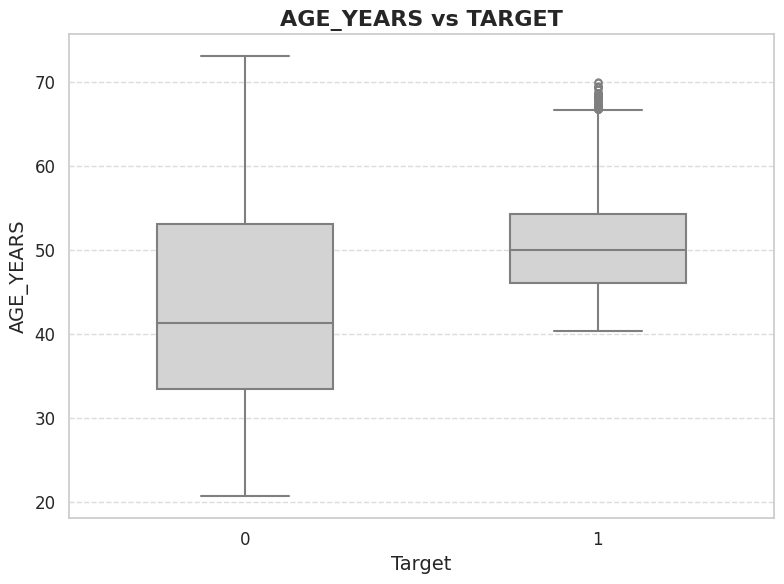


Descriptive statistics for YEARS_EMPLOYED grouped by TARGET:
           count       mean      std  min  25%   50%   75%   max
TARGET                                                          
0       250863.0   6.570497  6.13224  0.0  2.3   4.7   8.8  49.2
1        29722.0  12.723696  7.79433  3.9  6.8  10.3  16.2  46.4


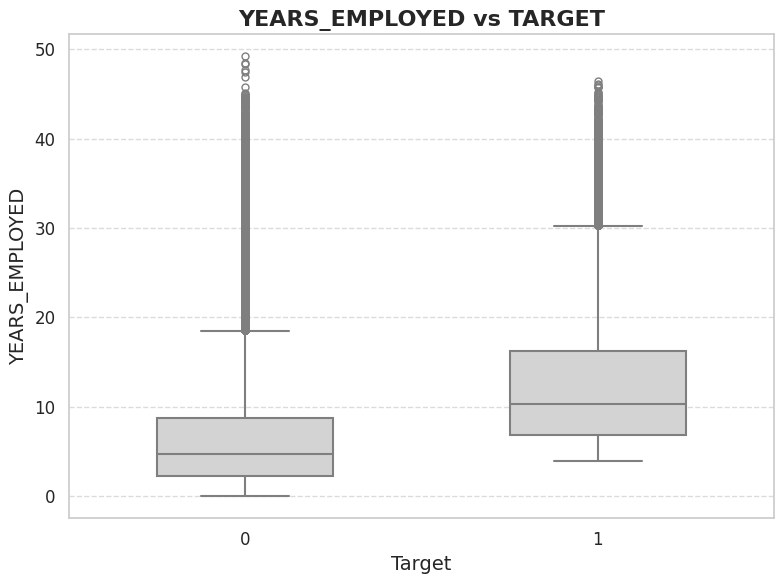


Descriptive statistics for CNT_FAM_MEMBERS grouped by TARGET:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       308704.0  2.219038  0.912094  1.0  2.0  2.0  3.0  20.0
1        29722.0  1.970695  0.719254  1.0  2.0  2.0  2.0  15.0


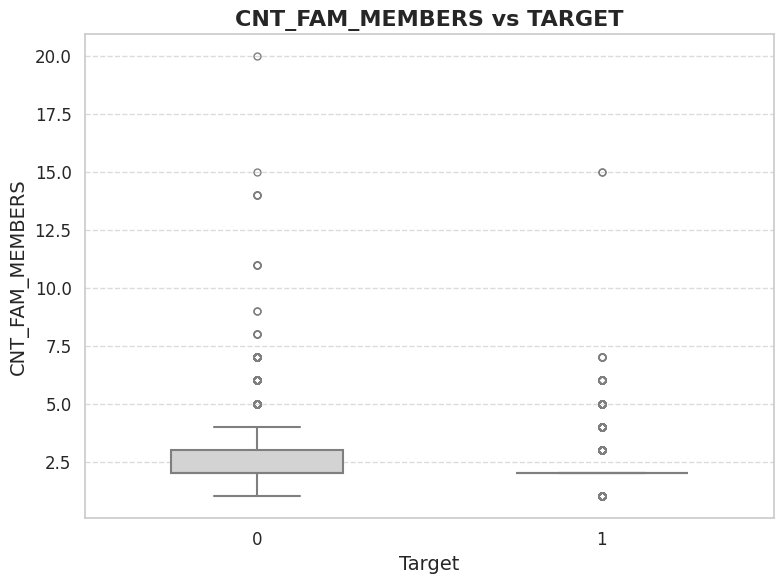

In [ ]:
# Define the columns to iterate over
columns_to_plot = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

# Iterate over the columns and create a boxplot for each one
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))

    # Create a boxplot with enhanced visual elements
    ax = sns.boxplot(x='TARGET', y=column, data=df, color='lightgray', width=0.5, fliersize=5, linewidth=1.5)

    # Customize the plot
    ax.set_title(f'{column} vs TARGET', fontsize=16, weight='bold')
    ax.set_xlabel('Target', fontsize=14)
    ax.set_ylabel(column, fontsize=14)

    # Improve the tick label size and rotation for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot with gridlines for better reading of values
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Display descriptive statistics for the column grouped by 'Response'
    target_stats = df.groupby('TARGET')[column].describe()
    print(f'\nDescriptive statistics for {column} grouped by TARGET:')
    print(target_stats)

    # Show the plot
    plt.tight_layout()
    plt.show()

Here we have several boxplots and descriptive statistics, comparing different quantitative features of the dataset and the target variable of our interest “TARGET” (binary variable equal to 1 if the customer demonstrates high creditworthiness, 0 otherwise):
- Those with no creditworthiness (TARGET=0) show a wider range of variation than those who do, speaking of CNT_CHILDREN;
- Those with no creditworthiness (TARGET=0) show a wider range of variation, in terms of annual income (AMT_INCOME_TOTAL) than those with it, and, again referring to TARGET=0, a much higher level of annual income (maximum point of the distribution) is reached than with TARGET=1. Despite this, the interquartile range in TARGET=1 (more concentrated total distribution) is higher than that found in TARGET=0 (more variable and scattered total distribution);
- Those who have no creditworthiness (TARGET=0) show a wider interquartile range than those who do, speaking of AGE_YEARS: tendentially, those with TARGET=0 may show a much more variable age than those with TARGET=1, on average;
- Those with creditworthiness (TARGET=1) have a more elevated interquartile range, in terms of the number of days elapsed since the date of employment (YEARS_EMPLOYED), than those with no creditworthiness, and, again with reference to TARGET=1, a much higher number of years (maximum point of the distribution) is reached than for TARGET=0;
- Those without creditworthiness (TARGET=0) have a slightly wider interquartile range, in terms of number of family members (CNT_FAM_MEMBERS), than those with creditworthiness.

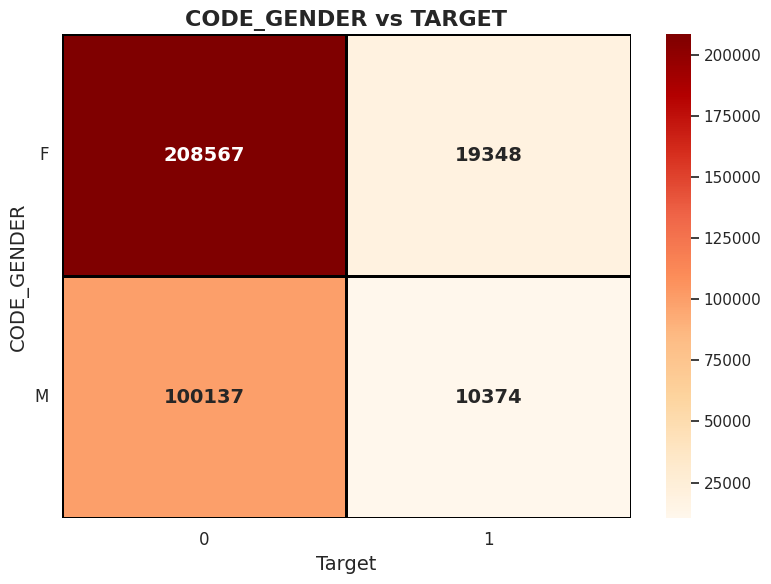

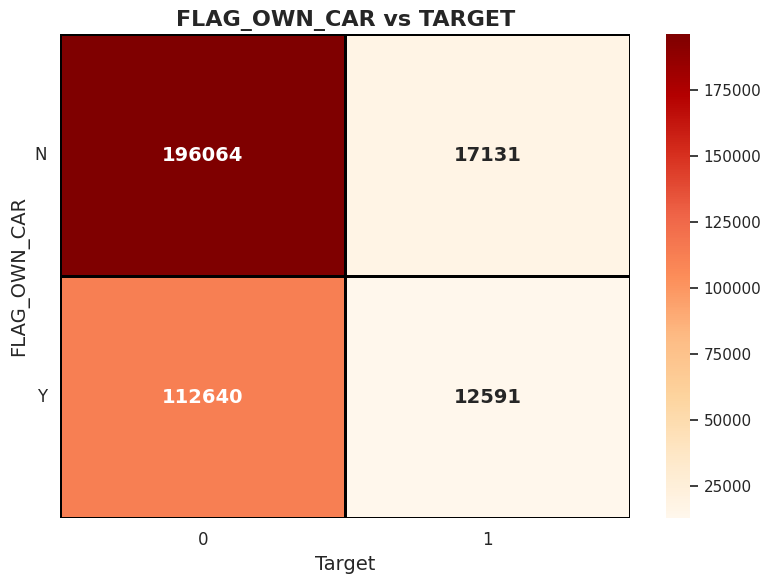

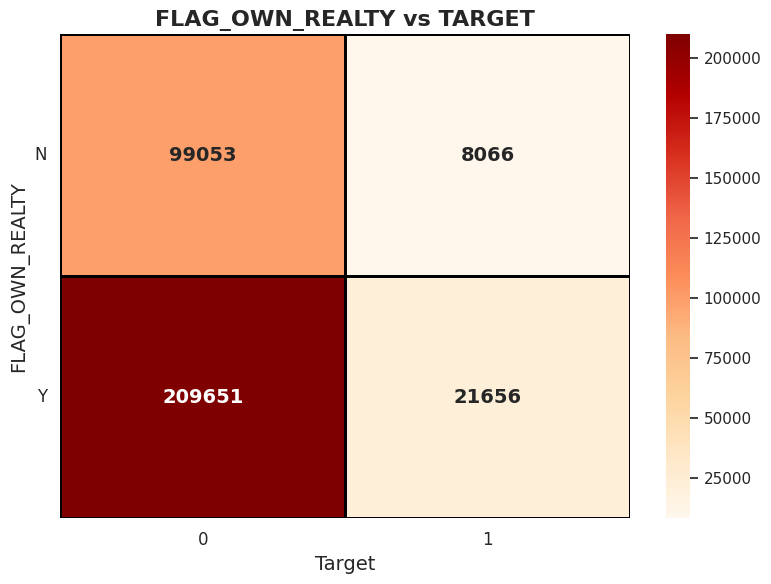

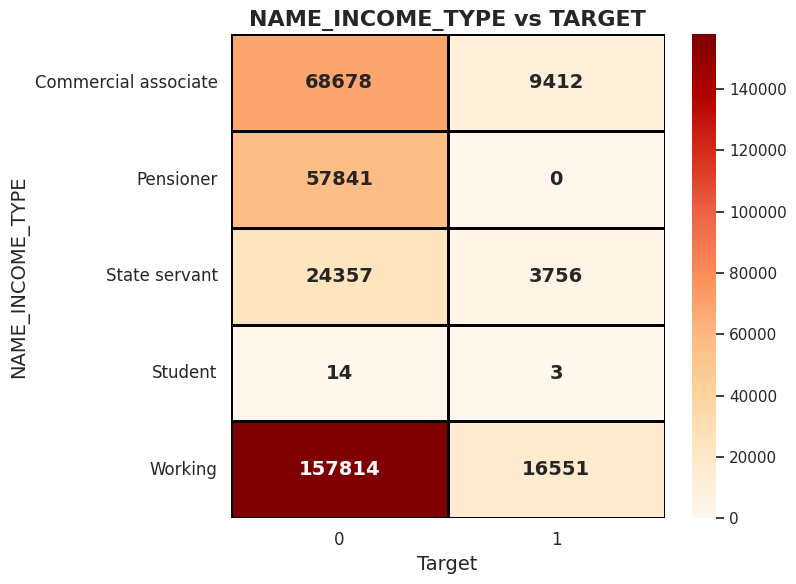

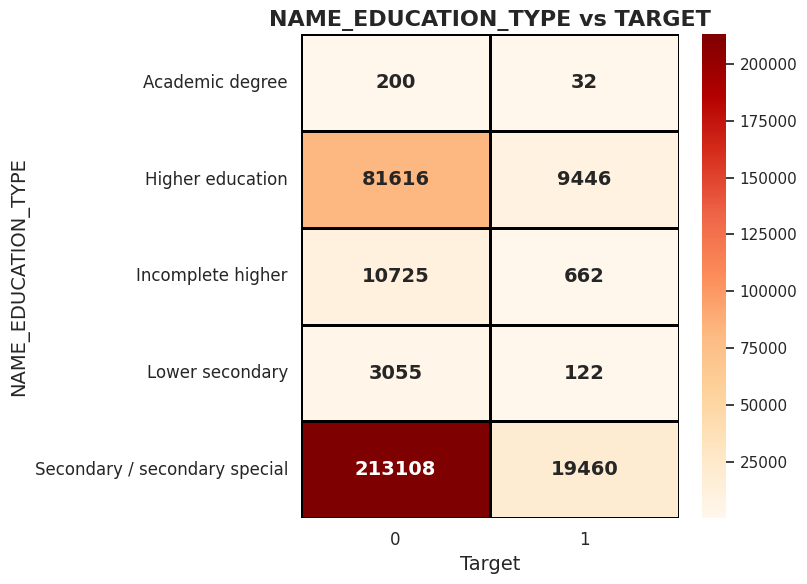

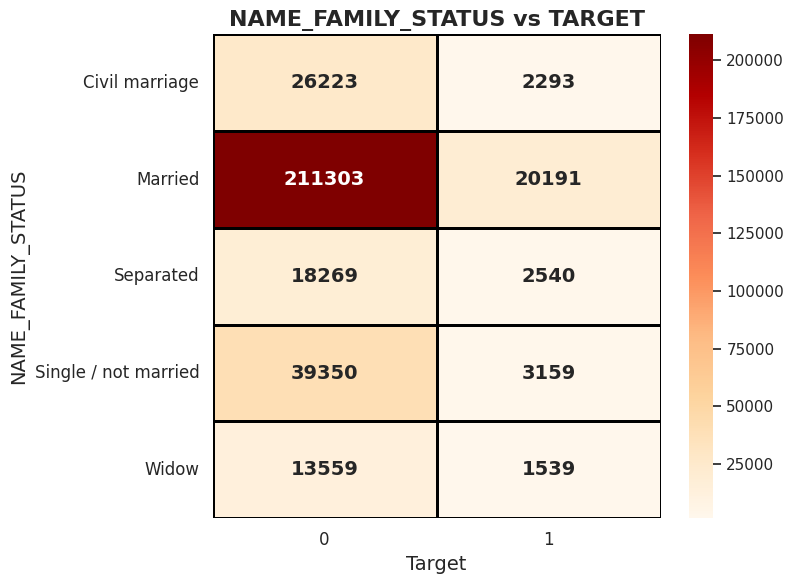

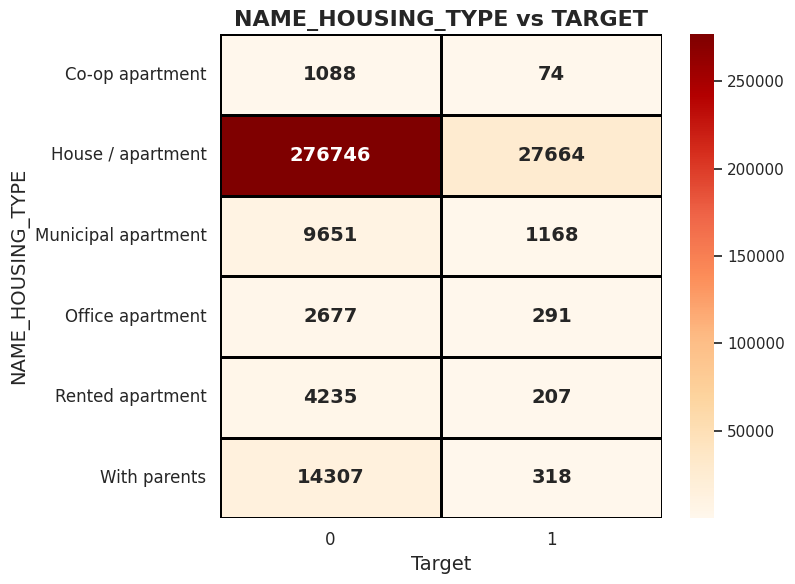

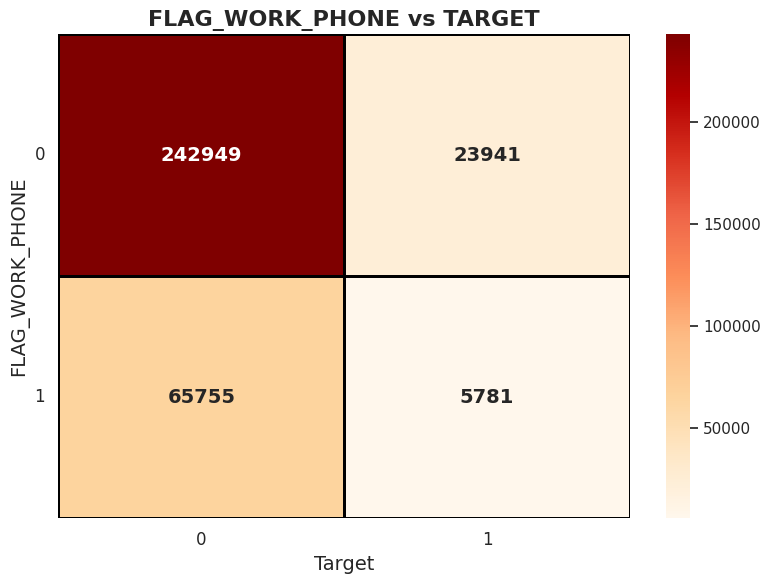

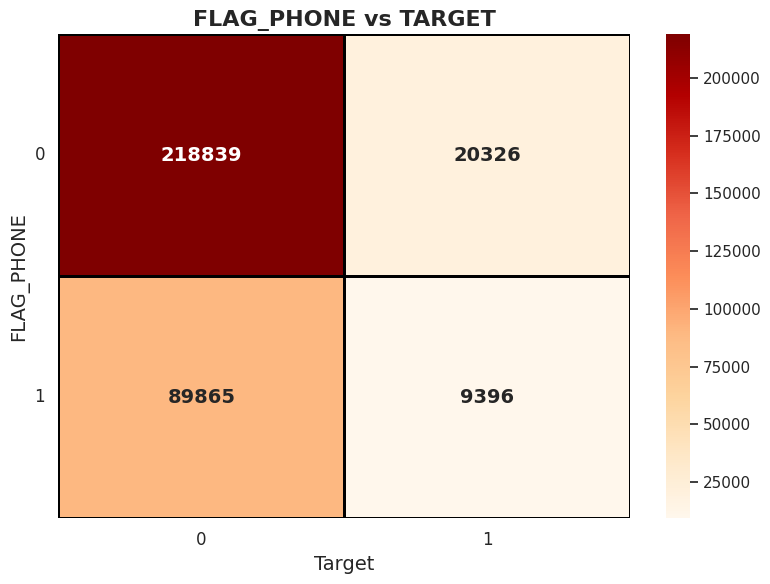

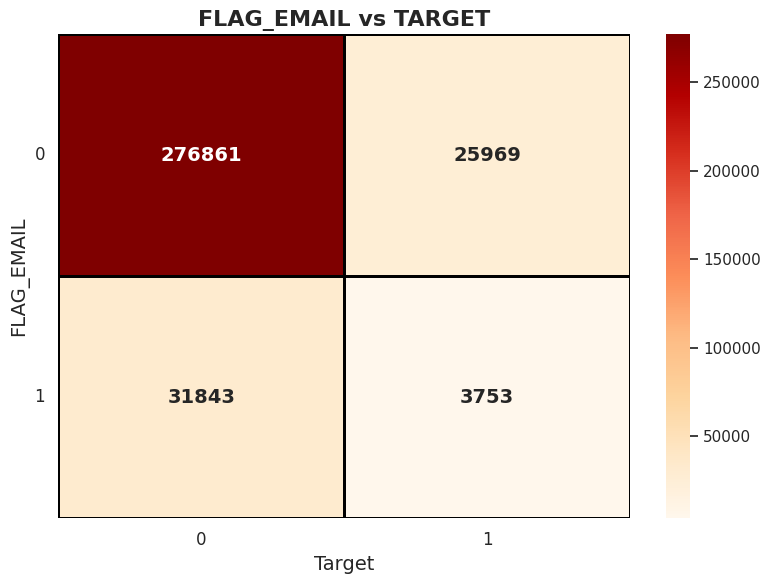

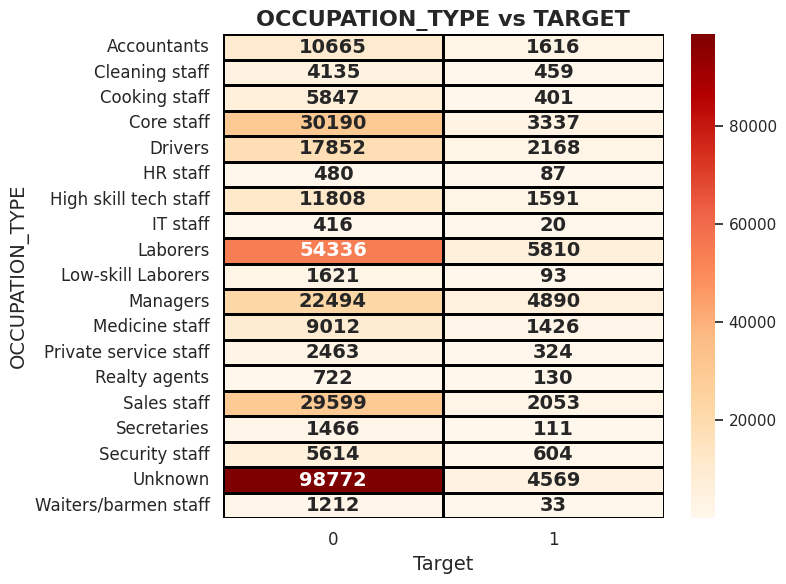

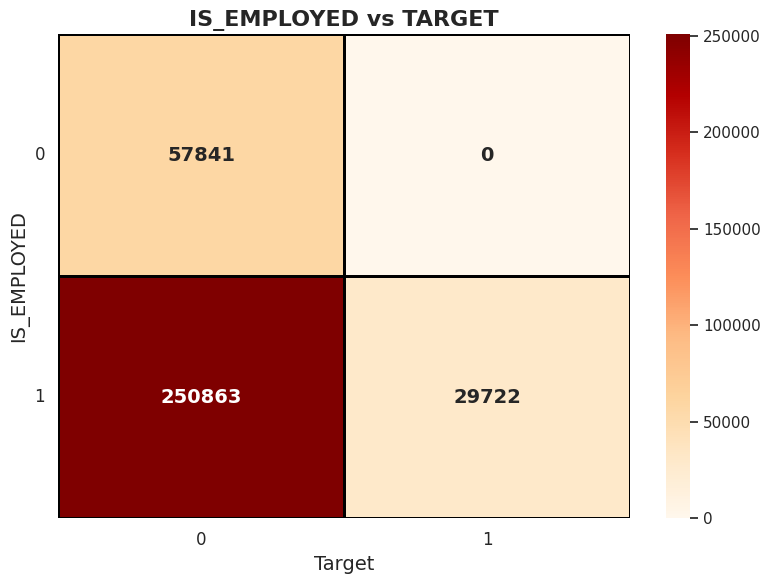

In [ ]:
# List of variables to visualize
variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
             'FLAG_EMAIL', 'OCCUPATION_TYPE', 'IS_EMPLOYED']

# Loop through each variable and create a contingency table and heatmap
for var in variables:
    # Create a contingency table (cross-tab) for each variable vs Response
    contingency_table = pd.crosstab(df[var], df['TARGET'])

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='OrRd', cbar=True,
                annot_kws={'size': 14, 'weight': 'bold'}, linewidths=1, linecolor='black')

    # Customize the plot
    plt.title(f'{var} vs TARGET', fontsize=16, weight='bold')
    plt.xlabel('Target', fontsize=14)
    plt.ylabel(var, fontsize=14)

    # Improve the tick label size and rotation for better readability
    plt.xticks(fontsize=12, rotation=0)  # No rotation for clarity
    plt.yticks(fontsize=12, rotation=0)

    # Show the plot with tight layout for better space distribution
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Add a short pause between plots to space them out visually
    fig, ax = plt.subplots(figsize=(8, 0.4))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='#f0f0f0'))
    ax.axis('off')
    plt.tight_layout()
    plt.show()

Here, however, we have different heatmaps, comparing different qualitative
features of the dataset and the target variable "TARGET":

- CODE_GENDER vs TARGET -> we have a majority of women, who do not have high creditworthiness;
- FLAG_OWN_CAR vs TARGET -> we have a majority of people who do not own a car and who do not have high creditworthiness;
- FLAG_OWN_REALTY vs TARGET -> we have a majority of people who are homeowners and do not have high creditworthiness;
- NAME_INCOME_TYPE vs TARGET -> we have a majority of working people who do not have high creditworthiness;
- NAME_EDUCATION_TYPE vs TARGET -> we have a majority of people with “Secondary / secondary special” level of education who do not have high creditworthiness;
- NAME_FAMILY_STATUS vs TARGET -> we have a majority of people who are married and do not have high creditworthiness;
- NAME_HOUSING_TYPE vs TARGET -> we have a majority of people living in an independent, house-format apartment who do not have high creditworthiness;
- FLAG_WORK_PHONE vs TARGET -> we have a majority of people who do not own a work phone and do not have high creditworthiness;
- FLAG_PHONE vs TARGET -> we have a majority of people who do not own a phone and do not have high creditworthiness;
- FLAG_EMAIL vs TARGET -> we have a majority of people who do not have an email address and do not have high creditworthiness;
- OCCUPATION_TYPE vs TARGET -> we have a majority of people with unknown employment status who do not have high creditworthiness;
- IS_EMPLOYED vs TARGET -> we have a majority of employed people with no creditworthness

In [ ]:
# Custom encoding of multiple columns using an iterative approach
mappings = {
    'CODE_GENDER': {'M': 1, 'F': 0},
    'FLAG_OWN_CAR': {'Y': 1, 'N': 0},
    'FLAG_OWN_REALTY': {'Y': 1, 'N': 0}
}

for col, mapping in mappings.items():
    df[col] = df[col].replace(mapping)
    df[col] = df[col].infer_objects(copy=False)

##**Label Encoding:**

Description of the codes for 'CODE_GENDER':
- "M" --> 1;
- "F" --> 0.

1 represents the male gender, and 0 represents the female gender.

Description of the codes for 'FLAG_OWN_CAR':
- "Y" --> 1;
- "N" --> 0.

1 represents that the customer owns a car, 0 otherwise.

Description of the codes for 'FLAG_OWN_REALTY':
- "Y" --> 1;
- "N" --> 0.

1 represents that the client owns a home, 0 otherwise.

In [ ]:
# Semantic grouping of education levels
def group_education_level(x):
    if x == 'Academic degree':
        return 'Advanced'
    elif x in ['Higher education', 'Incomplete higher']:
        return 'Higher'
    elif x == 'Secondary / secondary special':
        return 'Secondary'
    elif x == 'Lower secondary':
        return 'Basic'
    else:
        return 'Unknown'

# Overwrite the column with the newly grouped education levels
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].apply(group_education_level)

# Map the grouped categories to ordinal integer values
education_order = {
    'Basic': 0,
    'Secondary': 1,
    'Higher': 2,
    'Advanced': 3
}

df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(education_order)

# Display the first few rows
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,IS_EMPLOYED,AGE_YEARS,YEARS_EMPLOYED
0,5008804,1,1,1,0,424380.57,Working,2,Civil marriage,Rented apartment,1.0,1,0,0,Unknown,2.0,0,1,32.3,12.2
1,5008805,1,1,1,0,421593.52,Working,2,Civil marriage,Rented apartment,1.0,1,0,0,Unknown,2.0,0,1,32.3,12.2
2,5008806,1,1,1,0,110958.51,Working,1,Married,House / apartment,1.0,0,0,0,Security staff,2.0,0,1,58.8,3.1
3,5008808,0,0,1,0,267497.96,Commercial associate,1,Single / not married,House / apartment,1.0,0,1,1,Sales staff,1.0,1,1,50.7,8.6
4,5008809,0,0,1,0,263419.09,Commercial associate,1,Single / not married,House / apartment,1.0,0,1,1,Sales staff,1.0,1,1,52.3,8.4


##**Why this structure class change for NAME_EDUCATION_TYPE**:
The decision to group certain classes in NAME_EDUCATION_TYPE was made based on their semantic meaning and educational progression:

- "Academic degree" was grouped into Advanced because it represents higher education levels (e.g., master's or doctorate);

- "Higher education" and "Incomplete higher" were merged into Higher, as both refer to some form of higher education, regardless of completion;

- "Secondary / secondary special" was grouped as Secondary, representing high school or equivalent education;

- "Lower secondary" was grouped as Basic, representing education below high school (e.g., middle school).

This grouping simplifies the data, preserves the educational hierarchy, and improves model performance by reducing noise and overfitting from rare categories.

The mapping from original categories to ordinal codes is as follows:

- "Lower secondary" is grouped as Basic and encoded as 0;

- "Secondary / secondary special" is grouped as Secondary and encoded as 1;

- Both "Incomplete higher" and "Higher education" are grouped as Higher and encoded as 2;

- "Academic degree" is grouped as Advanced and encoded as 3.



In [ ]:
# Function for semantic grouping with compact but readable labels
def group_occupation_type(x):
    if x in ['Laborers', 'Low-skill Laborers']:
        return 'Manual_Workers'
    elif x in ['Core staff', 'Sales staff', 'Drivers', 'Cooking staff', 'Security staff',
               'Cleaning staff', 'Waiters/barmen staff', 'Private service staff', 'Secretaries']:
        return 'Support_Staff'
    elif x in ['Managers', 'High skill tech staff', 'Accountants', 'Medicine staff',
               'HR staff', 'IT staff', 'Realty agents']:
        return 'Specialists_Managers'
    else:
        return 'Unknown'

# Apply the grouping
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(group_occupation_type)

# Apply One-Hot Encoding with the new group names
df = pd.get_dummies(df, columns=['OCCUPATION_TYPE'], prefix='OCC', dtype=int)

# Display the first few rows
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET,IS_EMPLOYED,AGE_YEARS,YEARS_EMPLOYED,OCC_Manual_Workers,OCC_Specialists_Managers,OCC_Support_Staff,OCC_Unknown
0,5008804,1,1,1,0,424380.57,Working,2,Civil marriage,Rented apartment,...,0,2.0,0,1,32.3,12.2,0,0,0,1
1,5008805,1,1,1,0,421593.52,Working,2,Civil marriage,Rented apartment,...,0,2.0,0,1,32.3,12.2,0,0,0,1
2,5008806,1,1,1,0,110958.51,Working,1,Married,House / apartment,...,0,2.0,0,1,58.8,3.1,0,0,1,0
3,5008808,0,0,1,0,267497.96,Commercial associate,1,Single / not married,House / apartment,...,1,1.0,1,1,50.7,8.6,0,0,1,0
4,5008809,0,0,1,0,263419.09,Commercial associate,1,Single / not married,House / apartment,...,1,1.0,1,1,52.3,8.4,0,0,1,0


##**Why this structure class change for OCCUPATION_TYPE**:

A semantic regrouping was applied to the OCCUPATION_TYPE variable to reduce dimensionality, simplify interpretation, and enhance model generalization. Originally, this variable contained numerous specific job titles, some of which were infrequent or semantically overlapping. To address this, occupations were grouped into broader, meaningful categories based on the nature and hierarchy of the roles—such as 'Manual_Workers', 'Support_Staff', and 'Specialists_Managers'.

This restructuring helps mitigate issues related to high cardinality and class sparsity, making the dataset more stable and interpretable for machine learning models. Additionally, an 'Unknown' category was introduced to safely account for missing or undefined occupations, ensuring no data is lost during transformation.

Following this semantic grouping, One-Hot Encoding was applied, which transformed the variable into a set of binary indicator columns. Each column corresponds to one of the new occupation groups, making the categorical data compatible with numerical modeling techniques.

Resulting encoded variables:
- OCC_Manual_Workers;
- OCC_Support_Staff;
- OCC_Specialists_Managers;
- OCC_Unknown

In [ ]:
# Function for semantic grouping of income types
def group_income_type(x):
    if x in ['Working', 'Commercial associate']:
        return 'Private_Sector'
    elif x == 'State servant':
        return 'Public_Sector'
    elif x in ['Pensioner', 'Student']:
        return 'Inactive'
    else:
        return 'Other'

# Apply the grouping function
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].apply(group_income_type)

# One-Hot Encoding with meaningful labels
df = pd.get_dummies(df, columns=['NAME_INCOME_TYPE'], prefix='INC', dtype=int)

# Display the first few rows
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,IS_EMPLOYED,AGE_YEARS,YEARS_EMPLOYED,OCC_Manual_Workers,OCC_Specialists_Managers,OCC_Support_Staff,OCC_Unknown,INC_Inactive,INC_Private_Sector,INC_Public_Sector
0,5008804,1,1,1,0,424380.57,2,Civil marriage,Rented apartment,1.0,...,1,32.3,12.2,0,0,0,1,0,1,0
1,5008805,1,1,1,0,421593.52,2,Civil marriage,Rented apartment,1.0,...,1,32.3,12.2,0,0,0,1,0,1,0
2,5008806,1,1,1,0,110958.51,1,Married,House / apartment,1.0,...,1,58.8,3.1,0,0,1,0,0,1,0
3,5008808,0,0,1,0,267497.96,1,Single / not married,House / apartment,1.0,...,1,50.7,8.6,0,0,1,0,0,1,0
4,5008809,0,0,1,0,263419.09,1,Single / not married,House / apartment,1.0,...,1,52.3,8.4,0,0,1,0,0,1,0


##**Why this structure class change for NAME_INCOME_TYPE**:

This semantic regrouping of the NAME_INCOME_TYPE variable was done to reduce categorical granularity while preserving key socioeconomic distinctions relevant to income source and stability. Originally, the variable had five categories, including some with very low frequency (e.g., 'Student') or overlapping characteristics.

By mapping:

- 'Working' and 'Commercial associate' → Private_Sector;

- 'State servant' → Public_Sector;

- 'Pensioner' and 'Student' → Inactive

we consolidate categories based on economic role and employment status, which is often more meaningful for modeling than individual job labels. This grouping improves model robustness, reduces the risk of overfitting on rare classes, and enhances interpretability.

After this grouping, One-Hot Encoding was applied, generating new binary columns such as:

- INC_Private_Sector;

- INC_Public_Sector;

- INC_Inactive

Each row now includes mutually exclusive binary flags that indicate the grouped income type, allowing models to leverage this categorical feature effectively in a numeric format.

In [ ]:
# One-Hot Encoding for NAME_FAMILY_STATUS with underscores
df = pd.get_dummies(df, columns=['NAME_FAMILY_STATUS'], prefix='FAM_STATUS', dtype=int)

# Rename columns to replace spaces with "_" and "/" with "_"
df.columns = [col.replace(" ", "_").replace("/", "_") for col in df.columns]

# Clean up any occurrences of multiple consecutive underscores
df.columns = [col.replace("__", "_") for col in df.columns]

# One-Hot Encoding for NAME_HOUSING_TYPE with underscores
df = pd.get_dummies(df, columns=['NAME_HOUSING_TYPE'], prefix='HOUSING', dtype=int)

# Rename columns to replace spaces with "_" and "/" with "_"
df.columns = [col.replace(" ", "_").replace("/", "_") for col in df.columns]

# Clean up any occurrences of multiple consecutive underscores
df.columns = [col.replace("__", "_") for col in df.columns]

# Show results
pd.set_option('display.max_columns', None)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET,IS_EMPLOYED,AGE_YEARS,YEARS_EMPLOYED,OCC_Manual_Workers,OCC_Specialists_Managers,OCC_Support_Staff,OCC_Unknown,INC_Inactive,INC_Private_Sector,INC_Public_Sector,FAM_STATUS_Civil_marriage,FAM_STATUS_Married,FAM_STATUS_Separated,FAM_STATUS_Single_not_married,FAM_STATUS_Widow,HOUSING_Co-op_apartment,HOUSING_House__apartment,HOUSING_Municipal_apartment,HOUSING_Office_apartment,HOUSING_Rented_apartment,HOUSING_With_parents
0,5008804,1,1,1,0,424380.57,2,1.0,1,0,0,2.0,0,1,32.3,12.2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,1,0,421593.52,2,1.0,1,0,0,2.0,0,1,32.3,12.2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,1,0,110958.51,1,1.0,0,0,0,2.0,0,1,58.8,3.1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,5008808,0,0,1,0,267497.96,1,1.0,0,1,1,1.0,1,1,50.7,8.6,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,5008809,0,0,1,0,263419.09,1,1.0,0,1,1,1.0,1,1,52.3,8.4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


##**Pure One Hot Encoding for NAME_FAMILY_STATUS and NAME_HOUSING_TYPE:**

A pure One-Hot Encoding was used for both NAME_FAMILY_STATUS and NAME_HOUSING_TYPE because these variables:

- Have a limited number of distinct categories (5 for family status, 6 for housing type);

- Contain mutually exclusive values (each observation belongs to only one category per variable);

- Represent nominal data, where no natural order exists among the categories

This makes One-Hot Encoding the most appropriate and straightforward choice, as it allows the model to learn category-specific patterns without introducing any artificial ordinal relationship.

Additionally, column names were cleaned by replacing spaces and slashes (/) with underscores (_) and removing any duplicate underscores for clarity and compatibility with modeling tools.

From NAME_FAMILY_STATUS:
- FAM_STATUS_Married;
- FAM_STATUS_Single_not_married;
- FAM_STATUS_Civil_marriage;
- FAM_STATUS_Separated;
- FAM_STATUS_Widow

From NAME_HOUSING_TYPE:
- HOUSING_House_apartment;
- HOUSING_With_parents;
- HOUSING_Municipal_apartment;
- HOUSING_Rented_apartment;
- HOUSING_Office_apartment;
- HOUSING_Co-op_apartment

These new binary columns allow machine learning models to handle the categorical data efficiently in numerical form.

In [ ]:
# List of categorical variables to analyze
variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'INC_Private_Sector', 'INC_Public_Sector', 'INC_Inactive',
             'NAME_EDUCATION_TYPE', 'FAM_STATUS_Married', 'FAM_STATUS_Single_not_married', 'FAM_STATUS_Civil_marriage',
             'FAM_STATUS_Separated', 'FAM_STATUS_Widow', 'HOUSING_House__apartment', 'HOUSING_With_parents', 'HOUSING_Municipal_apartment',
             'HOUSING_Rented_apartment', 'HOUSING_Office_apartment', 'HOUSING_Co-op_apartment', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
             'FLAG_EMAIL', 'OCC_Manual_Workers', 'OCC_Support_Staff', 'OCC_Specialists_Managers', 'OCC_Unknown', 'IS_EMPLOYED', 'TARGET']

# Loop through each variable in the list
for col in variables:
    value_counts = df[col].value_counts(dropna=False)  # Include NaNs if present
    n_classes = value_counts.shape[0]      # Number of unique classes

    # Print formatted output
    print("=" * 50)
    print(f"Variable: {col}")
    print(f"Number of unique classes: {n_classes}")
    print("Classes and frequencies:")
    print(value_counts)
    print()  # Empty line for spacing

Variable: CODE_GENDER
Number of unique classes: 2
Classes and frequencies:
CODE_GENDER
0    227915
1    110511
Name: count, dtype: int64

Variable: FLAG_OWN_CAR
Number of unique classes: 2
Classes and frequencies:
FLAG_OWN_CAR
0    213195
1    125231
Name: count, dtype: int64

Variable: FLAG_OWN_REALTY
Number of unique classes: 2
Classes and frequencies:
FLAG_OWN_REALTY
1    231307
0    107119
Name: count, dtype: int64

Variable: INC_Private_Sector
Number of unique classes: 2
Classes and frequencies:
INC_Private_Sector
1    252455
0     85971
Name: count, dtype: int64

Variable: INC_Public_Sector
Number of unique classes: 2
Classes and frequencies:
INC_Public_Sector
0    310313
1     28113
Name: count, dtype: int64

Variable: INC_Inactive
Number of unique classes: 2
Classes and frequencies:
INC_Inactive
0    280568
1     57858
Name: count, dtype: int64

Variable: NAME_EDUCATION_TYPE
Number of unique classes: 4
Classes and frequencies:
NAME_EDUCATION_TYPE
1    232568
2    102449
0      

In [ ]:
# MANAGEMENT OF CLASS IMBALANCE
# Importing package
from sklearn.model_selection import train_test_split

# Set the RANDOM_SEED for reproducibility
RANDOM_SEED = 0

# Drop TARGET (label), ID (useless for training purposes), FLAG_MOBIL (only one class, always 1),
# CNT_CHILDREN (due to its high negative correlation with CNT_FAM_MEMBERS) and YEARS_EMPLOYED
# (negatively correlated with AGE_YEARS at -0.61, and replaced via feature engineering by IS_EMPLOYED,
# a binary indicator capturing employment status. IS_EMPLOYED summarizes the meaning of YEARS_EMPLOYED
# without explicitly representing it as a continuous variable, and it accounts for inactive clients
# who showed anomalously high positive values in YEARS_EMPLOYED).
x = df.drop(['TARGET', 'ID', 'FLAG_MOBIL', 'YEARS_EMPLOYED', 'CNT_CHILDREN'], axis=1).values

# Extract the values of the 'TARGET' column as the target variable y
y = df['TARGET'].values

# Split the dataset into training and testing sets (30% test size), using stratified sampling to preserve class distribution
# 'random_state' ensures reproducibility; 'stratify=y' handles class imbalance in the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [ ]:
# Number of examples * number of features in the training set
x_train.shape

(236898, 29)

In [ ]:
# Number of examples * number of features in the test set
x_test.shape

(101528, 29)

In [ ]:
# Importing package
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
ss = StandardScaler()

# Fit and transform the training data (x_train) to standardize it
# This scales the features by removing the mean and scaling to unit variance
x_train = ss.fit_transform(x_train)

# Transform the test data (x_test) using the same scaler, but do not fit again
# This ensures that the scaling applied to the test data is based on the training data
x_test = ss.transform(x_test)

In [ ]:
# CONSTRUCTION OF THE PREDICTIVE MODEL (LOGISTIC REGRESSION - BASELINE MODEL)
# Importing packages
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

# Create an oversampling sampler to balance the dataset
oversampler = RandomOverSampler(random_state=RANDOM_SEED)

# Create the logistic regression model with 'class_weight' set to 'balanced'
# 'class_weight="balanced"' adjusts the model to give more importance to the minority class
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED)

# Create the pipeline that includes the oversampling step and the logistic regression model
# The pipeline first applies oversampling, then trains the logistic regression model
pipeline = Pipeline([
    ('oversampler', oversampler),  # Step 1: Apply oversampling to balance the dataset
    ('logistic', model)  # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=0)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0))])

##**1. Oversampling (RandomOverSampler)**:

Oversampling is a technique used to address the imbalanced class problem, where one class (for example, the minority class) has significantly fewer samples compared to the other class. In a binary classification context, this issue arises when one class has many more examples than the other.

RandomOverSampler is an oversampling method that works by randomly duplicating samples from the minority class (or creating new synthetic samples in other methods like SMOTE) until the dataset is balanced.

###**What does oversampling do?**

Increases the minority class: It applies an algorithm that randomly duplicates instances of the minority class. In other words, the observations of the underrepresented class are repeated to balance the number of samples across both classes.

Example: If your dataset has 10,000 samples from class 0 and only 2,000 samples from class 1, oversampling might duplicate (or synthetically create) samples of class 1 until both classes have the same number of samples, for instance, 10,000 samples each.

###**Advantages of oversampling:**

Helps to reduce model bias towards the majority class (especially if the dataset is highly imbalanced).

Allows the model to better learn the distribution of the minority class by increasing the number of examples available for training.

###**Disadvantages of oversampling:**

Overfitting: Duplicating samples might lead to overfitting, where the model may learn to recognize just those repeated instances, which may not reflect the true variability of the data.

Lack of diversity in the data: Duplicating instances doesn't add new information, just more of the same, potentially reducing the ability to generalize.


##**2. class_weight='balanced'**:

The class_weight='balanced' parameter is a strategy for addressing class imbalance during model training. When set, it automatically adjusts the importance (weight) given to each class based on its frequency.

###**What does class_weight='balanced' do?**

It computes the inverse frequency of each class to ensure the model places more importance on the minority class. It essentially means the model will be penalized more for misclassifying minority class examples, making it more sensitive to those errors.

Example: If there are only 2,000 samples in the minority class and 10,000 samples in the majority class, class_weight='balanced' will assign a higher weight to the minority class so the model pays more attention to correctly predicting that class.

###**What it allows:**

Automatically adjusts the importance of each class, without requiring any changes to the dataset.

The result is that the model is penalized more for errors on the minority class, thus guiding the model to be more sensitive to that class during training.

###**Advantages of class_weight='balanced':**
No dataset modification needed: Unlike oversampling, there's no need to modify the dataset. The model adjusts its learning strategy internally.

Particularly useful when you don’t want to alter the structure of your dataset but still want the model to pay more attention to the minority class.

###**Disadvantages of class_weight='balanced':**

It might not be enough to solve overfitting for the majority class, as it doesn’t change the number of samples.

It doesn't solve the problem of scarcity of examples for the minority class, it just makes the model pay more attention to them.

##**Combining Oversampling and class_weight='balanced'**:

By combining oversampling and class_weight='balanced', you are trying to get the best of both worlds:

- Oversampling increases the number of samples from the minority class, so the model has more data to learn from;

- class_weight='balanced' ensures that the model gives more importance to the minority class when learning, by adjusting the weights during training.

This combination helps to address the class imbalance problem by ensuring that the model is both exposed to more examples of the minority class and also pays more attention to those examples during training.



In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
# This returns an array with the probabilities of each class for every sample
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
# This returns an array with the probabilities of each class for every sample in the test set
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

# Use a custom threshold (e.g., 0.4) to decide the predicted labels (1 or 0) based on the probability for the positive class.
# We choose a lower threshold (0.4) because the goal is to favor the detection of the minority class
# (Investigating the creditworthiness of customers).

In [ ]:
# Import packages
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score

# Define a function called 'classif_report' that accepts two arguments:
# - y_true: the true labels (actual values) of the data.
# - y_pred: the predicted labels (values predicted by the model).
def classif_report(y_true, y_pred):

    # Calculate and print the precision score.
    # Precision measures the percentage of correct predictions among all the predictions made as positive.
    precision = precision_score(y_true, y_pred)
    print(f"PRECISION: {round(precision, 2)}")

    # Calculate and print the recall score.
    # Recall measures the percentage of true positives correctly identified among all the actual positives.
    recall = recall_score(y_true, y_pred)
    print(f"RECALL: {round(recall, 2)}")

    # Calculate and print the F1 score.
    # The F1 score is the harmonic mean between precision and recall, and it is a good indicator of the model's overall performance.
    f1 = f1_score(y_true, y_pred)
    print(f"F1: {round(f1, 2)}")

    # Calculate and print the accuracy of the model.
    # Accuracy measures the percentage of correct predictions (both positive and negative) out of all predictions.
    accuracy = accuracy_score(y_true, y_pred)
    print(f"ACCURACY: {round(accuracy, 2)}")

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
# In this case, 'y_train' represents the true labels (actual values), while 'y_pred_train' represents
# the predicted values from the model for the training set.
classif_report(y_train, y_pred_train)

PRECISION: 0.27
RECALL: 0.95
F1: 0.42
ACCURACY: 0.77


##**1. Precision: 0.27**
###**What it represents:**

Precision tells us the proportion of customers predicted as creditworthy (class "1") who actually are creditworthy. It answers: “Of all the clients predicted as creditworthy, how many truly were?”

###**In this case:**

A precision of 0.27 means that only 27% of the customers classified by the model as creditworthy truly are. This is quite low, implying a high false positive rate — many customers are wrongly labeled as creditworthy, which could lead to approving loans for individuals who may default.

##**2. Recall: 0.95**
###**What it represents:**

Recall measures the ability of the model to correctly identify all truly creditworthy customers. It answers: “Of all the actual creditworthy clients, how many did the model detect?”

###**In this case:**
A recall of 0.95 means the model successfully identifies 95% of creditworthy applicants. This is very high and indicates that the model rarely misses genuinely creditworthy clients (low false negatives), which is favorable from a risk-minimization standpoint.

##**3. F1 Score: 0.42**
###**What it represents:**
The F1 score balances precision and recall. It’s useful in imbalanced scenarios where one class is much rarer — like truly creditworthy customers.

###**In this case:**
An F1 score of 0.42 reflects a poor balance: despite excellent recall, the low precision drags down overall performance. The model finds most creditworthy individuals but misclassifies too many non-creditworthy ones as safe, compromising reliability.

##**4. Accuracy: 0.77**
###**What it represents:**
Accuracy measures the overall proportion of correct predictions across both classes.

###**In this case:**
An accuracy of 0.77 might seem good, but due to class imbalance (most applicants are likely non-creditworthy), it can be misleading. The model may achieve high accuracy simply by favoring the majority class (non-creditworthy) while underperforming on the minority (creditworthy).

##**Interpretation for Credit Risk Context:**
**Precision (0.27)**: Low precision means many customers incorrectly flagged as creditworthy could be granted credit they shouldn’t receive — potentially increasing default risk and financial losses.

**Recall (0.95)**: High recall is excellent — nearly all truly creditworthy customers are identified. This reduces missed opportunities to lend to reliable clients.

**F1 Score (0.42)**: The poor F1 score suggests an imbalance — the model aggressively identifies creditworthy clients but lacks precision, leading to misclassification of high-risk individuals as low-risk.

**Accuracy (0.77)**: This overall accuracy is not meaningful in isolation due to the imbalance. A model that mostly predicts the majority class could still score highly without being effective for the business goal (correctly identifying trustworthy borrowers).

##**Are these values good?**
In credit scoring, high recall is helpful to avoid rejecting reliable clients, but low precision can be dangerous — wrongly approving unreliable ones. While recall shows the model is cautious not to miss good borrowers, improving precision is crucial to avoid high financial risk.

The current model is overly generous and needs tuning to reduce false positives. Techniques like threshold adjustment, class rebalancing, or using precision-oriented evaluation metrics could help achieve a better trade-off.

In [ ]:
# same for the test set.
classif_report(y_test, y_pred_test)

PRECISION: 0.27
RECALL: 0.95
F1: 0.42
ACCURACY: 0.77


We have similar results in the test set as in the training set.

In [ ]:
# Here, we used "classification report" directly from scikit-learn (train set).
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    216093
           1       0.27      0.95      0.42     20805

    accuracy                           0.77    236898
   macro avg       0.63      0.85      0.64    236898
weighted avg       0.93      0.77      0.82    236898



In [ ]:
# same for the test set.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     92611
           1       0.27      0.95      0.42      8917

    accuracy                           0.77    101528
   macro avg       0.63      0.85      0.64    101528
weighted avg       0.93      0.77      0.82    101528



Here, we can see the performance metrics for both classes (train set and test set).

With only Logistic Regression (baseline model), we don't have good performances for this latest model (class_weight="balance" + OverSampling). Now, we'll try to test other advanced models, in order to obtain better performances, for example with a Random Forest model.

##**SUGGESTION:**
In order to avoid having to run the code to find the optimal random forest hyperparameters, below this code section, it's possible to find the same pipeline (final_pipeline) with the hyperparameters found thanks to Random Search.

In [ ]:
# CONSTRUCTION OF THE PREDICTIVE MODEL (RANDOM FOREST)
# Importing packages
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define StratifiedKFold for balanced cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_SEED)

# Building the pipeline with random forest and oversampling
pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=RANDOM_SEED)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_SEED))
])

# Defining the hyperparameter search space for random search
param_distributions = {
    'rf__n_estimators': randint(100, 300),  # increase the range of n_estimators
    'rf__max_depth': [15, 20, None], # test different depths for the trees
    'rf__min_samples_leaf': [2, 4], # test different minimum samples per leaf
    'rf__min_samples_split': [4, 8], # test different minimum samples to split a node
    'rf__max_features': ['sqrt', 'log2'] # test different methods for selecting features to split
}

# Configuring the randomized search
random_search = RandomizedSearchCV(
    estimator=pipeline, # use the pipeline above
    param_distributions=param_distributions, # take the param_distributions above
    n_iter=10,  # number of random combinations to evaluate
    scoring='f1',  # use f1 score for evaluation
    cv=cv,  # StratifiedKFold numbers
    n_jobs=1,  # use one core
    random_state=RANDOM_SEED, # use RANDOM_SEED for random_state
    verbose=2  # display detailed output during the search
)

# Training the optimized model
random_search.fit(x_train, y_train)

# Best parameters and f1 score
print("best parameters found:")
print(random_search.best_params_)

print("\nbest f1 score in cross-validation:")
print(round(random_search.best_score_, 3))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END rf__max_depth=15, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=167; total time=  59.3s
[CV] END rf__max_depth=15, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=167; total time=  49.5s
[CV] END rf__max_depth=15, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=167; total time=  48.7s
[CV] END rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=136; total time=  41.3s
[CV] END rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=136; total time=  41.4s
[CV] END rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=136; total time=  41.0s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=4

In [ ]:
# DIRECT USE OF THE OPTIMIZED MODEL (without retraining via Random Search)
# This section can be used to train and make predictions directly
# using the best hyperparameters found previously, without repeating RandomizedSearchCV
# Importing package
from sklearn.ensemble import RandomForestClassifier

# Building the pipeline with random forest and oversampling
final_pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=RANDOM_SEED)),
    ('rf', RandomForestClassifier(
        n_estimators=158,
        max_depth=None,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=4,
        class_weight='balanced',
        random_state=RANDOM_SEED
    ))
])

# Train the model on the training set
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=0)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, min_samples_split=4,
                                        n_estimators=158, random_state=0))])

In [ ]:
# Predictions on the train set
y_proba_train = final_pipeline.predict_proba(x_train)  # predict probabilities on the train set
y_pred_train = np.where(y_proba_train[:, 1] > 0.3, 1, 0)  # convert probabilities to binary predictions (threshold 0.3)

# Predictions on the test set
y_proba_test = final_pipeline.predict_proba(x_test)  # predict probabilities on the test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.3, 1, 0)  # convert probabilities to binary predictions (threshold 0.3)

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
# In this case, 'y_train' represents the true labels (actual values), while 'y_pred_train' represents
# the predicted values from the model for the training set.
classif_report(y_train, y_pred_train)

PRECISION: 0.61
RECALL: 1.0
F1: 0.76
ACCURACY: 0.94


In [ ]:
# same for the test set.
classif_report(y_test, y_pred_test) # We can see the performance metrics for positive class (train set and test set).

PRECISION: 0.53
RECALL: 0.96
F1: 0.69
ACCURACY: 0.92


In [ ]:
# Here, we used "classification report" directly from scikit-learn (train set).
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    216093
           1       0.61      1.00      0.76     20805

    accuracy                           0.94    236898
   macro avg       0.81      0.97      0.86    236898
weighted avg       0.97      0.94      0.95    236898



In [ ]:
# same for the test set.
print(classification_report(y_test, y_pred_test)) # We can see the performance metrics for both classes (train set and test set).

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     92611
           1       0.53      0.96      0.69      8917

    accuracy                           0.92    101528
   macro avg       0.76      0.94      0.82    101528
weighted avg       0.96      0.92      0.93    101528



In [ ]:
# Function to plot the confusion matrix
# y_true: the true labels
# y_pred: the predicted labels from the model
# labels: a list containing the names of the classes (default is "Negative" and "Positive")
# show_precision_recall: if set to True, it also shows precision and recall metrics on the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=False):

    # Calculate the confusion matrix (true negative, false positive, false negative, true positive)
    cm = confusion_matrix(y_true, y_pred)  # tn, fp, fn, tp

    # Create a DataFrame for the confusion matrix, with labels for the rows and columns
    df_cm = pd.DataFrame(cm, index=labels,
                         columns=["Predicted "+labels[0], "Predicted "+ labels[1]])

    # Plot the confusion matrix as a heatmap using seaborn
    sns.heatmap(df_cm, annot=True, fmt="g")

    # If 'show_precision_recall' is True, calculate and display precision and recall on the confusion matrix
    if show_precision_recall:
        # Calculate and display precision (for the positive class)
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        plt.text(0, -0.1, f"Precision: {precision:.2f}")  # Place the precision value on the heatmap

        # Calculate and display recall (for the positive class)
        recall = cm[1][1] / (cm[1][1] + cm[1][0])
        plt.text(1, -0.1, f"Recall: {recall:.2f}")  # Place the recall value on the heatmap

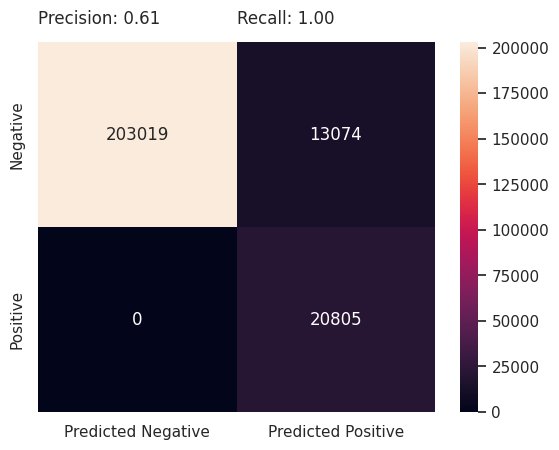

In [ ]:
# Plot the confusion matrix for the training set, with the true labels y_train
# and the predicted labels y_pred_train.
# Set 'show_precision_recall=True' to also display the precision and recall metrics
# on the confusion matrix.
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

##**What is a Confusion Matrix?**

A confusion matrix is a performance measurement tool for classification models. It is a table used to evaluate the accuracy of a classification algorithm by comparing the actual (true) values to the predicted values made by the model. This matrix helps to visualize the performance of the algorithm in a more detailed manner.

The confusion matrix is typically used for binary classification (i.e., when there are two classes), but it can be extended to multi-class classification as well.

##**Breakdown of Elements:**
- True Negative (TN): The number of times the model correctly predicted the negative class (i.e., the model predicted negative when the true class was also negative);

- False Positive (FP): The number of times the model incorrectly predicted the positive class (i.e., the model predicted positive when the true class was negative). This is also known as a "Type I error";

- False Negative (FN): The number of times the model incorrectly predicted the negative class (i.e., the model predicted negative when the true class was positive). This is also known as a "Type II error";

- True Positive (TP): The number of times the model correctly predicted the positive class (i.e., the model predicted positive when the true class was also positive).

##**How to Read the Matrix?**
In our case:

- True Negative (TN) = 203019: 203019 times the model predicted Negative, and the true class was indeed Negative.

- False Positive (FP) = 13074: 13074 times the model predicted Positive, but the true class was Negative.

- False Negative (FN) = 0: 0 times the model predicted Negative, but the true class was Positive.

- True Positive (TP) = 20805: 20805 times the model predicted Positive, and the true class was indeed Positive.

##**Why Use a Confusion Matrix?**
- Balanced Evaluation: It allows you to evaluate your model beyond simple accuracy, which can be misleading in imbalanced datasets. For example, if the dataset has a very high number of negative samples (class imbalance), accuracy might be high simply because the model is predicting the majority class (negative) most of the time. However, precision, recall, and F1 score provide better insights into how well the model handles both classes;

- Performance Insights: The confusion matrix helps to directly see where the model is making errors (e.g., more false positives or false negatives), which allows you to focus on improving the model in specific areas.

##**Visualizing the Confusion Matrix with Precision and Recall**
In the function plot_confusion_matrix(y_true, y_pred, show_precision_recall=True), if show_precision_recall=True is passed, the function calculates the precision and recall values and places them on the confusion matrix visualization. This will help you understand at a glance how well your model is identifying both the positive and negative classes, along with these key metrics.

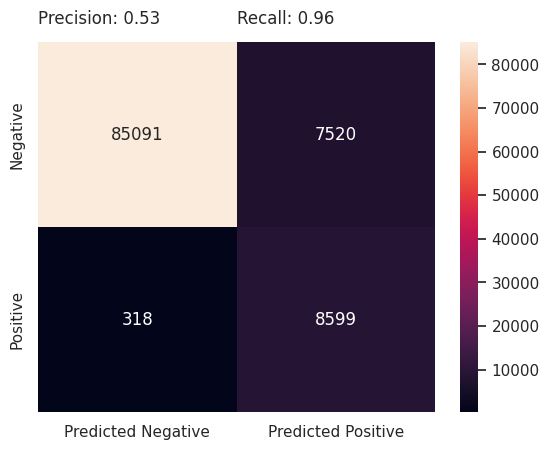

In [ ]:
# same for test set.
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True) # Here, what we said previously for the confusion matrix (train set)
                                                                       # also applies here for the test set.

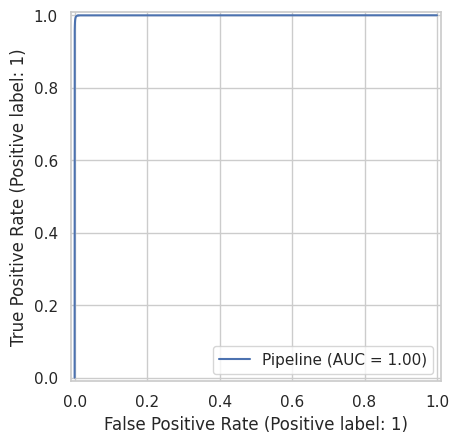

In [ ]:
# Plot the ROC (Receiver Operating Characteristic) curve for the random forest model
# using the training set (x_train and y_train)
RocCurveDisplay.from_estimator(final_pipeline, x_train, y_train)

##**1. ROC Curve (Receiver Operating Characteristic Curve):**
The ROC curve is a graphical representation used to evaluate the performance of a classification model, particularly when the classes are imbalanced. It is primarily used in binary classification tasks (i.e., two classes: Positive and Negative). The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds:

- True Positive Rate (TPR), also called Recall or Sensitivity, is the proportion of actual positives that are correctly identified as positive by the model;

- False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly identified as positive by the model.

The ROC curve is a plot where:

- The x-axis represents the False Positive Rate (FPR);

- The y-axis represents the True Positive Rate (TPR).

Each point on the ROC curve corresponds to a different threshold value used for classification. By adjusting the threshold, you get different values of TPR and FPR, and these are plotted on the curve.

###**Key Features of the ROC Curve:**
- Diagonal Line (Random Classifier): The diagonal line (also called the line of no discrimination) represents the performance of a random classifier. A random classifier would have a 50% chance of correctly classifying a positive or negative instance, so the ROC curve would lie along this line. In practice, you want your model to perform better than this.

The higher the ROC curve, the better your model is at distinguishing between the positive and negative classes.

- Threshold Adjustment: As you move along the ROC curve, you're changing the decision threshold for classifying instances as positive or negative. Lowering the threshold increases the number of predicted positives, which tends to increase TPR but also increases FPR.

###**Interpreting the ROC Curve:**
- Closer to the top-left corner: A good model’s ROC curve should curve upwards towards the top-left corner of the plot. This indicates a high true positive rate and a low false positive rate, meaning the model is doing well at identifying positive instances and not misclassifying many negative ones;

- Closer to the diagonal line: If the ROC curve is closer to the diagonal, it indicates a model that is not doing much better than random guessing;

- Steep curve: A sharp rise to the top-left corner indicates that the model quickly starts identifying positives correctly without many false positives, which is ideal.

##**2. AUC (Area Under the Curve):**
AUC stands for Area Under the ROC Curve. It quantifies the overall performance of the model. AUC is a scalar value that tells us how well the model distinguishes between the classes.

AUC ranges from 0 to 1:

- AUC = 1: Perfect model. It perfectly separates positive and negative classes with no errors;

- AUC = 0.5: Random model. The model is no better than random guessing;

- AUC < 0.5: The model is performing worse than random guessing. This usually happens when the model is predicting the wrong class for almost all instances.

The AUC value gives you a measure of how much the model is capable of distinguishing between classes:

- AUC = 0.8-0.9: Good model;

- AUC = 0.7-0.8: Fair model;

- AUC = 0.6-0.7: Poor model;

- AUC < 0.6: Model has poor performance.

###**How to Interpret AUC:**
- High AUC (close to 1): A high AUC value indicates that the model has a strong ability to differentiate between the positive and negative classes. The higher the AUC, the better the model's predictive ability.

- Low AUC (close to 0.5): An AUC near 0.5 indicates that the model does not distinguish between the positive and negative classes any better than random chance.

- Very Low AUC (below 0.5): This could indicate that the model has serious issues, potentially learning the wrong patterns or being heavily biased in predicting the wrong class.

##**ROC Curve and AUC in Practice:**
In practice, both the ROC curve and AUC are especially useful in scenarios where there is a class imbalance (i.e., when one class is much more frequent than the other). In such cases, accuracy alone may not be a good metric for evaluating performance, as a model that predicts the majority class every time could still achieve high accuracy but perform poorly for the minority class.

ROC Curve helps to evaluate the trade-offs between True Positives and False Positives at different thresholds. It tells you how well your model performs for various thresholds and is particularly useful when you care about adjusting thresholds to optimize recall, precision, or any other specific metric.

AUC gives a single scalar value that summarizes the model's overall ability to discriminate between the positive and negative classes. This is especially helpful when you want to compare different models.

##**When to Use:**
ROC Curve is useful when you want to evaluate how well your model performs across all possible thresholds.

AUC is useful when you want a single value that summarizes your model’s ability to distinguish between classes.

In our case (predicting whether a customer will accept an offer or not), we have an AUC of 1 and the ROC curve is positioned in the top-left corner, this indicates that the model is performing quite well in distinguishing between the two classes (accepting the offer = Positive, not accepting the offer = Negative). We're talking about the train set.

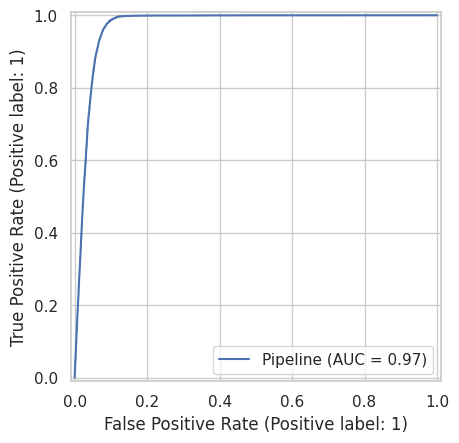

In [ ]:
# same for test set
RocCurveDisplay.from_estimator(final_pipeline, x_test, y_test) # What we said before also applies here (test set).

                        Feature  Importance
10           FAM_STATUS_Married    0.421044
3              AMT_INCOME_TOTAL    0.384384
9           NAME_EDUCATION_TYPE    0.049579
15     HOUSING_House__apartment    0.032695
8                  INC_Inactive    0.021493
16         HOUSING_With_parents    0.012130
14             FAM_STATUS_Widow    0.011893
12    FAM_STATUS_Civil_marriage    0.005961
4               CNT_FAM_MEMBERS    0.005941
17  HOUSING_Municipal_apartment    0.005809


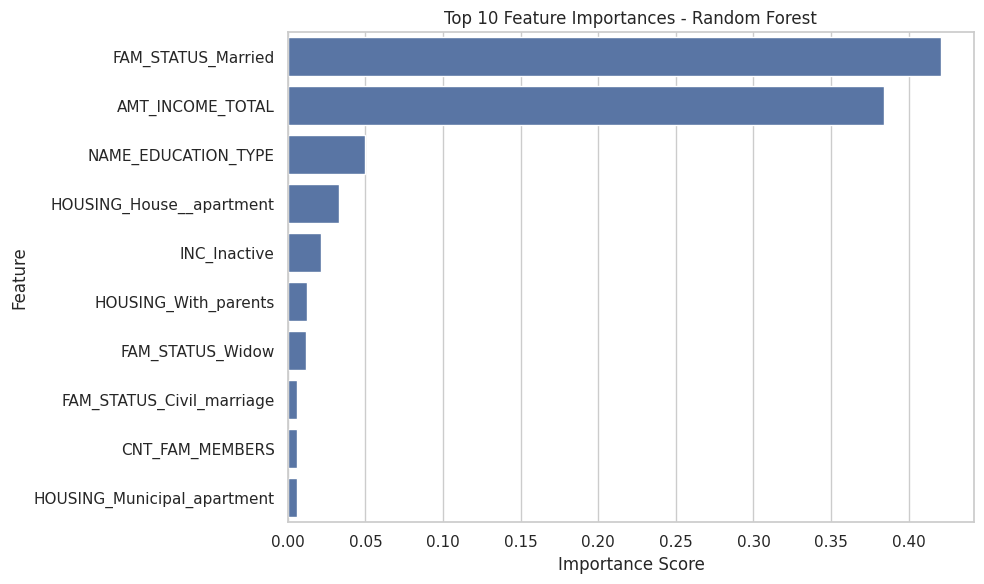

In [ ]:
# MODEL INTERPRETATION
# Extract the model from final_pipeline
rf_model = final_pipeline.named_steps['rf']

# Compute feature importances
importances = rf_model.feature_importances_

# Use the provided feature names
feature_names = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
                 'INC_Private_Sector', 'INC_Public_Sector', 'INC_Inactive',
                 'NAME_EDUCATION_TYPE', 'FAM_STATUS_Married', 'FAM_STATUS_Single_not_married', 'FAM_STATUS_Civil_marriage',
                 'FAM_STATUS_Separated', 'FAM_STATUS_Widow', 'HOUSING_House__apartment', 'HOUSING_With_parents',
                 'HOUSING_Municipal_apartment', 'HOUSING_Rented_apartment', 'HOUSING_Office_apartment',
                 'HOUSING_Co-op_apartment', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                 'OCC_Manual_Workers', 'OCC_Support_Staff', 'OCC_Specialists_Managers', 'OCC_Unknown', 'IS_EMPLOYED']

# Create a DataFrame and sort features by importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##**Feature Importance Interpretation – Creditworthiness Prediction Model:**
In this case, the model aims to predict whether a customer has good creditworthiness based on various features (e.g., marital status, income, housing situation). The feature importance values you extracted from the Random Forest model show how much each feature contributes to determining whether a customer is considered reliable for credit (good creditworthiness) or not.

###**Key Findings**
- **FAM_STATUS_Married (42.1%)**: being married is the most significant factor influencing the model’s prediction. This could be because married individuals might be perceived as more financially stable, with potential joint income or shared financial responsibilities. In a credit scoring context, this may indicate lower risk, as people with stable family situations are often seen as more responsible with their finances.

- **AMT_INCOME_TOTAL (38.4%)**: total income plays a crucial role in determining creditworthiness. Higher income levels are usually associated with a better ability to repay debts, making income a key factor in assessing financial reliability. This makes sense in a credit scoring model, as income directly impacts a person’s ability to handle debt.

- **NAME_EDUCATION_TYPE (4.96%)**: the type or level of education also impacts the model, though its importance is much lower compared to marital status and income. Education is often linked to employment opportunities, and individuals with higher education levels may have better career prospects and, therefore, a more stable financial situation.

- **HOUSING_House__apartment (3.27%)**: owning a house or apartment is another indicator of financial stability. Homeownership can suggest that an individual has long-term financial planning capabilities, which could be a positive sign for creditworthiness. It may also reflect a lower likelihood of default since homeownership often requires a stable income and financial planning.

- **INC_Inactive (2.15%)**: being inactive (such as unemployed or not participating in the workforce) has a small but notable effect. Inactive individuals are typically considered higher risk in terms of creditworthiness because they may not have a reliable source of income.

- **HOUSING_With_parents (1.21%)**: living with parents could be indicative of financial instability or a lack of independence. This variable has a relatively small impact, but it may still be used to determine the likelihood of good creditworthiness. It could suggest lower financial autonomy or less stability, potentially leading to a higher credit risk.

- **FAM_STATUS_Widow (1.19%)**: being widowed is slightly less influential but still relevant. It could suggest financial instability or changes in income or family structure, which may impact the ability to manage finances and thus affect creditworthiness.

- **FAM_STATUS_Civil_marriage (0.60%)**: similar to being married, civil marriage status has some effect, though its contribution is less than that of formal marriage. It may be associated with financial commitment or stability, but its lower importance reflects a smaller impact on creditworthiness predictions.

- **CNT_FAM_MEMBERS (0.59%)**: the number of family members has a small impact on the model. This could reflect the financial burden of supporting multiple family members, which might affect the customer’s ability to maintain good creditworthiness, though its influence is limited.

- **HOUSING_Municipal_apartment (0.58%)**: living in municipal housing has a small influence. It may indicate a lower income or fewer financial resources, which could be seen as a higher credit risk. However, its importance is minimal compared to other factors like income and marital status.

##**What Do These Results Tell Us About Creditworthiness?**
- **Main Determinants of Creditworthiness:** the model identifies marital status and income as the two most important factors. This makes sense in the context of credit risk because married individuals with higher income levels are typically seen as more financially stable and capable of handling debt.

- **Minor Influence of Other Factors:** features like education level, housing situation, and family status contribute to a lesser degree. While they are not as significant as income and marital status, they still add value to the model by providing additional context about an individual’s financial stability.

- **Lower Impact of Employment and Family Size:** variables like being inactive or having a larger family size have relatively small influences on creditworthiness. Inactive individuals may represent higher risk, and a larger family size may suggest greater financial obligations, but these factors are secondary to income and marital status.

- **Risk Assessment Based on Housing and Family Status:** living with parents or in municipal apartments might indicate a higher credit risk, as these situations could suggest financial instability or dependency. On the other hand, owning a house or apartment is a positive indicator of creditworthiness.

##**CONCLUSIONS**:
Despite this, it is necessary to further improve the performance of this model (using other models, trying to further optimize hyperparameters, employing SMOTE or UnderSampling in combination with class_weight=‘balance’ and so on).

In this case, a Random Forest model was employed because it was necessary to balance performance and interpretability requirements, because if we wanted to prefer only performance maximization we would have had to employ another model (ex: neural network).

There are also models that natively handle unbalanced target classes, e.g., XGBoost (advanced optimal solution).